In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

# Loading Dataset

In [3]:
df = pd.read_csv('/kaggle/input/pakistan-house-price-prediction/Entities.csv')

In [4]:
df.tail(2)

,Unnamed: 0,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
168444,168444,17355251,6752,https://www.zameen.com/Property/gulshan_e_maym...,House,11000000,Gadap Town,Karachi,Sindh,25.013265,67.120818,0,For Sale,3,7/18/2019,Al Shahab Enterprises,Shahmir,21235.578
168445,168445,17355287,10045,https://www.zameen.com/Property/bahria_town_ka...,House,9000000,Bahria Town Karachi,Karachi,Sindh,25.113565,67.353811,3,For Sale,3,7/18/2019,ZPN Real Estate & Builders,Ali Raza,25591.594


In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     168446 non-null  int64  
 1   property_id    168446 non-null  int64  
 2   location_id    168446 non-null  int64  
 3   page_url       168446 non-null  object 
 4   property_type  168446 non-null  object 
 5   price          168446 non-null  int64  
 6   location       168446 non-null  object 
 7   city           168446 non-null  object 
 8   province_name  168446 non-null  object 
 9   latitude       168446 non-null  float64
 10  longitude      168446 non-null  float64
 11  baths          168446 non-null  int64  
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Total_Area     168446 non-nul

Unnamed: 0           0
property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Total_Area           0
dtype: int64

# Scatterplot Of Houss Prices and Cities

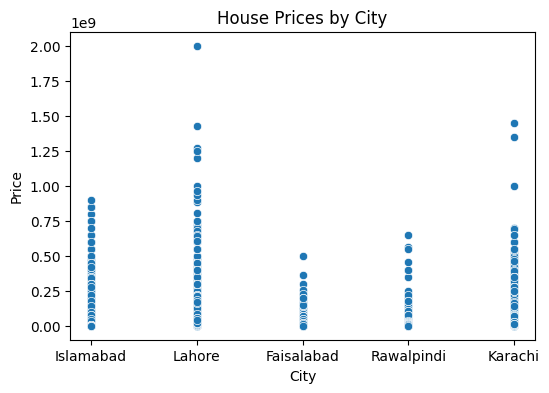

In [6]:
plt.figure(figsize = (6, 4))
sns.scatterplot(x = 'city', y = 'price', data = df )
plt.title('House Prices by City')
plt.xlabel('City')
plt.ylabel('Price')
plt.show()

In [7]:
df.head(7)

,Unnamed: 0,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
0,0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2/4/2019,NaN,NaN,1089.004
1,1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,5/4/2019,NaN,NaN,15246.056
2,2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,7/17/2019,NaN,NaN,2178.008
3,3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,4/5/2019,NaN,NaN,10890.000
4,4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,7/10/2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.008
5,5,850762,3390,https://www.zameen.com/Property/ghauri_town_gh...,House,34500000,Ghauri Town,Islamabad,Islamabad Capital,33.623947,73.126588,8,For Sale,8,4/5/2019,NaN,NaN,87120.000
6,6,937975,445,https://www.zameen.com/Property/islamabad_kora...,House,27000000,Korang Town,Islamabad,Islamabad Capital,33.579034,73.139591,8,For Sale,8,1/4/2019,NaN,NaN,5445.000


# Price Visualization Of Each City

In [8]:
islamabad_data = df[df['city'] == 'Islamabad']
karachi_data = df[df['city'] == 'Karachi']
rawalpindi_data = df[df['city'] == 'Rawalpindi']
lahore_data = df[df['city'] == 'Lahore']

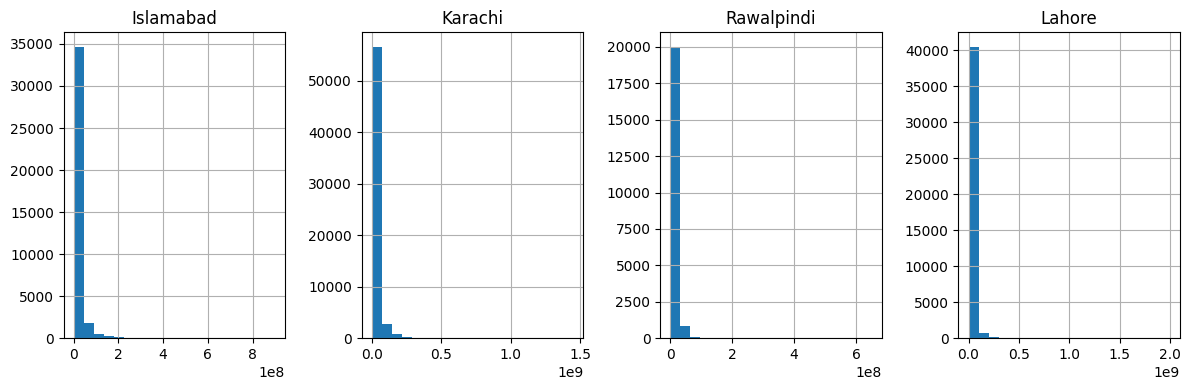

In [9]:
plt.figure(figsize = (12, 4))

plt.subplot(1, 4, 1)
plt.hist(islamabad_data['price'], bins = 20)
plt.grid()
plt.title('Islamabad')

plt.subplot(1, 4, 2)
plt.hist(karachi_data['price'], bins = 20)
plt.grid()
plt.title('Karachi')

plt.subplot(1, 4, 3)
plt.hist(rawalpindi_data['price'], bins = 20)
plt.grid()
plt.title('Rawalpindi')

plt.subplot(1, 4, 4)
plt.hist(lahore_data['price'], bins = 20)
plt.grid()
plt.title('Lahore')

plt.tight_layout()
plt.show()

In [10]:
df.columns.tolist()

['Unnamed: 0',
 'property_id',
 'location_id',
 'page_url',
 'property_type',
 'price',
 'location',
 'city',
 'province_name',
 'latitude',
 'longitude',
 'baths',
 'purpose',
 'bedrooms',
 'date_added',
 'agency',
 'agent',
 'Total_Area']

# Correlation Matrix
Identifying key matrics that impact the house prices

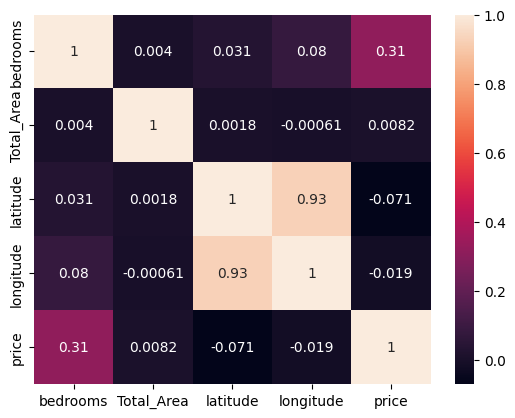

In [11]:
corr_matrix = df[['bedrooms', 'Total_Area', 'latitude', 'longitude', 'price']].corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [12]:
df.describe()

,Unnamed: 0,property_id,location_id,price,latitude,longitude,baths,bedrooms,Total_Area
count,168446.000000,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,1.684460e+05
mean,84222.500000,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422,1.394239e+04
std,48626.316059,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401,8.623647e+05
min,0.000000,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000e+00
25%,42111.250000,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000,1.905757e+03
50%,84222.500000,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000,4.356016e+03
75%,126333.750000,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000,1.197904e+04
max,168445.000000,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000,3.387988e+08


Drop irrelevant columns to reduce dimensionality


In [13]:
df.drop(['Unnamed: 0', 'property_id', 'location_id', 'page_url', 'date_added', 'agency', 'agent'], axis=1, inplace=True)


In [14]:
df.head(1)

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,Total_Area
0,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.67989,73.01264,2,For Sale,2,1089.004


# LabelEncoder
- Use label encoding instead of one-hot encoding to simplify the dataset


In [15]:
le = LabelEncoder()

In [16]:
columns_to_encode = ['purpose', 'location', 'city', 'province_name', 'property_type']
df[columns_to_encode] = df[columns_to_encode].apply(lambda x: LabelEncoder().fit_transform(x))

* **df[columns_to_encode]** selects the specified columns.
* **apply** applies a function to each column.
* The **lambda** function create a LabelEncoder objects for each column and fits and transform the data

In [17]:
df.head(5)

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,Total_Area
0,1,10000000,488,1,0,33.679890,73.012640,2,1,2,1089.004
1,1,6900000,415,1,0,33.700993,72.971492,3,1,3,15246.056
2,2,16500000,493,1,0,33.631486,72.926559,6,1,5,2178.008
3,2,43500000,211,1,0,33.707573,73.151199,4,1,4,10890.000
4,2,7000000,351,1,0,33.492591,73.301339,3,1,3,2178.008


In [18]:
df.isnull().sum()

property_type    0
price            0
location         0
city             0
province_name    0
latitude         0
longitude        0
baths            0
purpose          0
bedrooms         0
Total_Area       0
dtype: int64

# Separating The Dataset
Our dataset is completely fine, there is **not object/string** and there is **no NaN**

In [19]:
new_df = df.drop('price', axis = 1)
target = df['price']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(new_df, target, test_size = 0.2, random_state = 42)

In [21]:
len(X_train), len(y_train), len(X_test), len(y_test)

(134756, 134756, 33690, 33690)

# Building Multiple Models

In [22]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror')
}

In [23]:
results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': model_name,
        'Mean Squared Error': mse,
        'Mean Absolute Error': mae,
        'R^2 Score': r2
    })

results_df = pd.DataFrame(results)

results_df.sort_values(by='R^2 Score', ascending=False, inplace=True)

print(results_df)

               Model  Mean Squared Error  Mean Absolute Error  R^2 Score
2      Random Forest        1.818778e+14         3.282603e+06   0.843090
4            XGBoost        2.176874e+14         4.462169e+06   0.812196
1      Decision Tree        2.740582e+14         3.571758e+06   0.763563
3  Gradient Boosting        4.022702e+14         7.257025e+06   0.652952
0  Linear Regression        9.487680e+14         1.508767e+07   0.181475


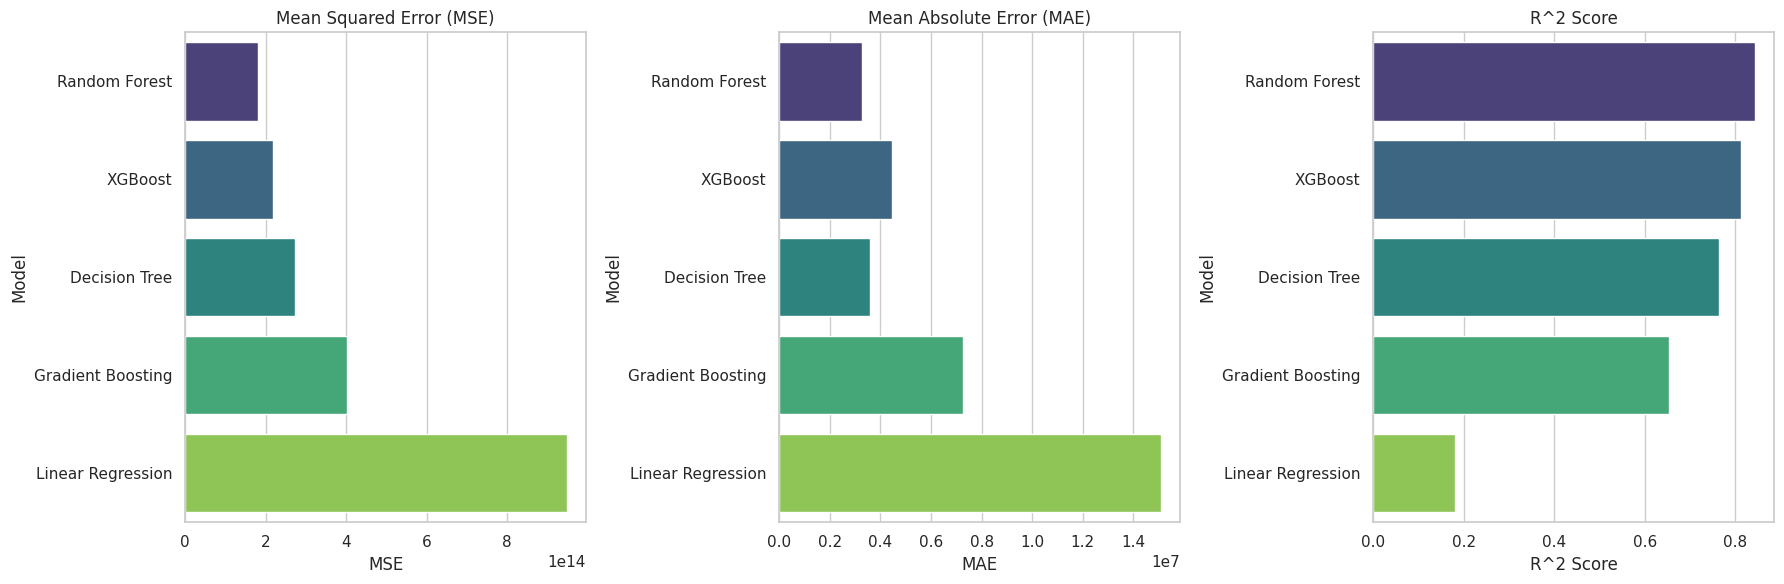

In [24]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(x='Mean Squared Error', y='Model', data=results_df, ax=axes[0], palette='viridis')
axes[0].set_title('Mean Squared Error (MSE)')
axes[0].set_xlabel('MSE')
axes[0].set_ylabel('Model')

sns.barplot(x='Mean Absolute Error', y='Model', data=results_df, ax=axes[1], palette='viridis')
axes[1].set_title('Mean Absolute Error (MAE)')
axes[1].set_xlabel('MAE')
axes[1].set_ylabel('Model')

sns.barplot(x='R^2 Score', y='Model', data=results_df, ax=axes[2], palette='viridis')
axes[2].set_title('R^2 Score')
axes[2].set_xlabel('R^2 Score')
axes[2].set_ylabel('Model')

plt.tight_layout()
plt.show()